# KMeans Clustering on Student Academic Data
This notebook demonstrates how to apply **KMeans clustering** to student academic data to identify distinct performance groups.

### Input:
- CSV File: `filtered_student_data.csv`
- Columns used: `gpa_gap`, `number_of_remaining_fail_subjects`, `absence_rate`

### Output:
- Visualized clusters of students
- Trained KMeans model
- Elbow method plot for optimal cluster selection

## Importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import drive

## Importing the dataset

In [ ]:
drive.mount('/content/drive', force_remount= True)
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/filtered_student_data.csv')
X = dataset[['gpa_gap', 'number_of_remaining_fail_subjects', 'absence_rate']]
X = X.dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
display(dataset)

Mounted at /content/drive


,absence_rate,gpa_gap,number_of_remaining_fail_subjects,student_code
0,0.193878,4.380000,5,HE153311
1,0.000000,3.300000,0,HA150114
2,0.018182,4.100000,0,HE200393
3,0.257143,1.675000,1,HE161024
4,0.000000,2.300000,0,HE176048
5,0.014706,10.000000,0,HS200562
6,0.095238,5.766667,3,HE151088
7,0.000000,3.100000,1,HE181171
8,0.128205,2.960000,2,HE172186
9,0.062500,3.550000,0,HE187221


## Using the elbow method to find the optimal number of clusters

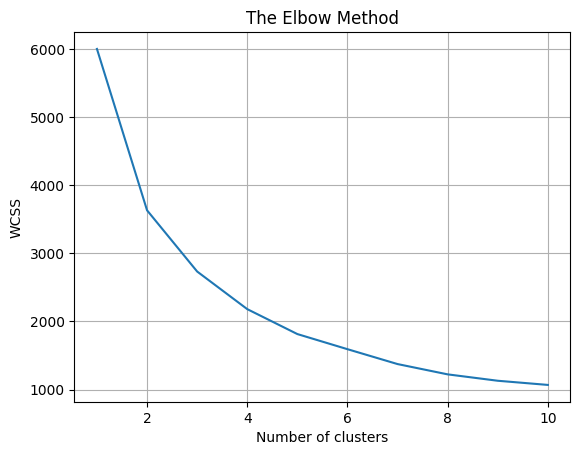

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

The optimal number of clusters was determined using the Elbow Method. As shown in the Elbow chart, the Within-Cluster Sum of Squares (WCSS) significantly decreases as the number of clusters increases, with a sharp decline observed from k = 1 to k = 3. After k = 3, the rate of improvement begins to plateau, indicating diminishing returns in clustering quality. This “elbow” at k = 3 suggests that three clusters provide a good balance between reducing intra-cluster variance and maintaining model simplicity. Therefore, we selected k = 3 as the optimal number of clusters.

# Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
dataset = dataset.dropna(subset=['gpa_gap', 'number_of_remaining_fail_subjects', 'absence_rate']).reset_index(drop=True)
dataset['Cluster'] = y_kmeans

# Visualising the clusters

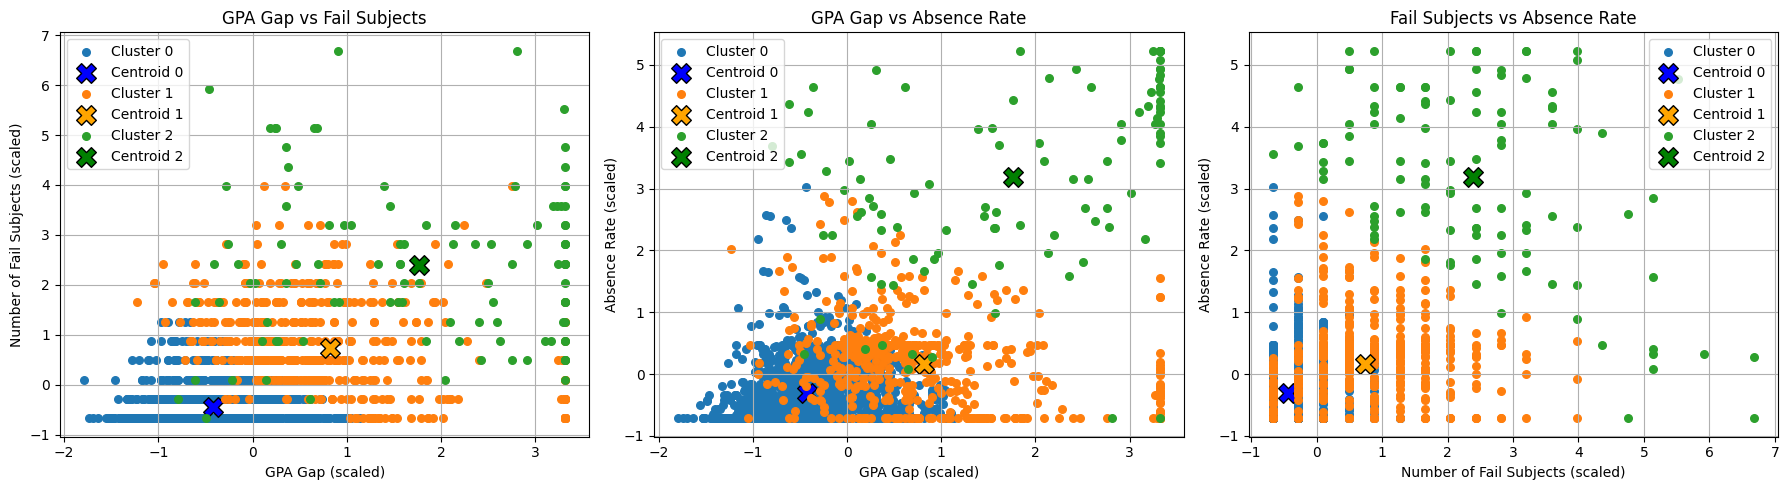

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ['blue', 'orange', 'green']  # Centroid color (optional)

# --- Graph 1: GPA Gap vs Fail Subjects ---
axes[0].set_title("GPA Gap vs Fail Subjects")
for cluster in range(3):
    axes[0].scatter(
        X_scaled[y_kmeans == cluster, 0],
        X_scaled[y_kmeans == cluster, 1],
        label=f"Cluster {cluster}",
        s=30
    )
    axes[0].scatter(
        kmeans.cluster_centers_[cluster, 0],
        kmeans.cluster_centers_[cluster, 1],
        s=200,
        c=colors[cluster],
        edgecolors='black',
        marker='X',
        label=f"Centroid {cluster}"
    )
axes[0].set_xlabel("GPA Gap (scaled)")
axes[0].set_ylabel("Number of Fail Subjects (scaled)")
axes[0].legend()
axes[0].grid(True)

# --- Graph 2: GPA Gap vs Absence Rate ---
axes[1].set_title("GPA Gap vs Absence Rate")
for cluster in range(3):
    axes[1].scatter(
        X_scaled[y_kmeans == cluster, 0],
        X_scaled[y_kmeans == cluster, 2],
        label=f"Cluster {cluster}",
        s=30
    )
    axes[1].scatter(
        kmeans.cluster_centers_[cluster, 0],
        kmeans.cluster_centers_[cluster, 2],
        s=200,
        c=colors[cluster],
        edgecolors='black',
        marker='X',
        label=f"Centroid {cluster}"
    )
axes[1].set_xlabel("GPA Gap (scaled)")
axes[1].set_ylabel("Absence Rate (scaled)")
axes[1].legend()
axes[1].grid(True)

# --- Graph 3: Fail Subjects vs Absence Rate ---
axes[2].set_title("Fail Subjects vs Absence Rate")
for cluster in range(3):
    axes[2].scatter(
        X_scaled[y_kmeans == cluster, 1],
        X_scaled[y_kmeans == cluster, 2],
        label=f"Cluster {cluster}",
        s=30
    )
    axes[2].scatter(
        kmeans.cluster_centers_[cluster, 1],
        kmeans.cluster_centers_[cluster, 2],
        s=200,
        c=colors[cluster],
        edgecolors='black',
        marker='X',
        label=f"Centroid {cluster}"
    )
axes[2].set_xlabel("Number of Fail Subjects (scaled)")
axes[2].set_ylabel("Absence Rate (scaled)")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

The three identified clusters represent distinct student performance profiles based on GPA gap, number of failed subjects, and absence rate:

* **Cluster 0 (Blue)**: This group shows students with relatively low GPA gaps, very few failed subjects, and low absence rates. These students are likely to be academically stable and require minimal intervention.

* **Cluster 1 (Orange)**: Students in this cluster have moderate GPA gaps and a higher number of failed subjects than Cluster 0. Their absence rates vary, indicating they may be struggling due to academic challenges or inconsistent engagement. They should be monitored and possibly provided with academic support.

* **Cluster 2 (Green)**: This group includes students with the highest GPA gaps, failure rates, and often elevated absence levels. These students are likely at high academic risk and need immediate intervention or personalized care strategies.

Overall, the clustering reveals meaningful distinctions among student groups, enabling targeted support and resource allocation.